In [1]:
import os, re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
def sep_ponct(my_str, rule = r"([.,?!])"):
    """separer les mots avec les char de ponctuation"""
    #print(my_str)
    sp0 = re.split(rule, my_str)
    sp1 = [data.strip() for data in sp0]
    res = [data for data in sp1 if (data != '') ]
    return res

In [3]:
data=pd.read_csv('data.tsv',sep='\t')
dataQ=data.Question
dataA=data.Answer
Q=[]
A=[]
Q2W=[]# liste de mots pour chaque phrase 
A2W=[]
for i in range(len(dataQ)):
    Q.append(dataQ[i].lower())
for each in Q: 
    each_list = sep_ponct(each)
    remisEsp = ' '.join(each_list)
    Q2W.append(remisEsp.split(" "))
for i in range(len(dataA)):
    A.append(dataA[i].lower())
for each in A:
    each_list = sep_ponct(each)
    remisEsp = ' '.join(each_list)
    A2W.append(remisEsp.split(" "))

In [4]:
#data.describe()

In [5]:
import gensim, logging

In [6]:
window_size=2
N=len(Q2W)
vector_size=3
tout=Q2W+A2W
model=gensim.models.Word2Vec(tout,vector_size=vector_size, window=2, min_count=1, workers=4)

In [7]:
def UpdateMatrice():
    V=[]
    for i in range (N):
        s=np.zeros(vector_size)
    for j in range(len(Q2W[i])):
        motInconnu(Q2W[i][j])
        wv=np.array(model.wv.get_vector(Q2W[i][j]))
        s+=wv
    V.append(list(s))
    return V

In [8]:
from spellchecker import SpellChecker

In [9]:
spell = SpellChecker()

misspelled = spell.unknown(['let','kdwog', 'us', 'wlak','namme','the','groun'])

for word in misspelled:
    print(word)

    print(spell.correction(word))

wlak
walk
kdwog
dog
namme
name


In [11]:
def motInconnu(mot):
    try:
        model.wv.get_vector(mot.lower())   
    except:
        spell = SpellChecker()
        mot=str(mot)
        #model.build_vocab([[str(mot)]], update=True)
        #UpdateMatrice
        print("We can't understand this word ",mot,". Do you want to say this word ",'\'',spell.correction(mot),'\'')
        print("If yes, please enter Y else enter the correct word ! ")
        x = str(input())
        if(x!="Y"):
            return x 
        else:
            return spell.correction(mot)
        
        
motInconnu("namee")

We can't understand this word  namee . Do you want to say this word  ' name '
If yes, please enter Y else enter the correct word ! 
Y


'name'

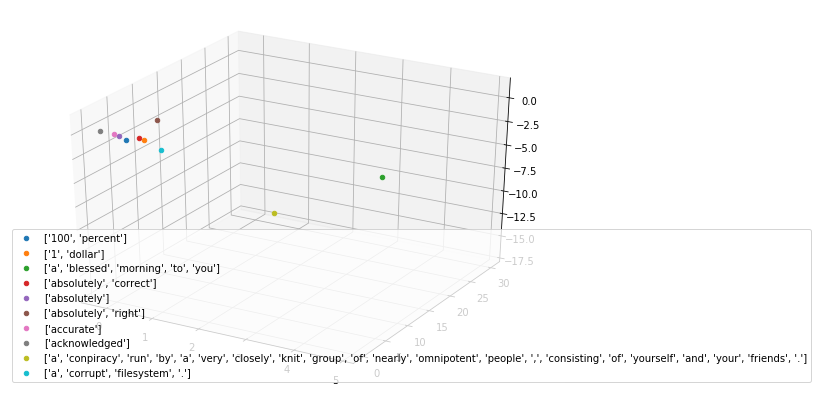

In [22]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
V=[]
for i in range (N):
    s=np.zeros(vector_size)
    for j in range(len(Q2W[i])):
        motInconnu(Q2W[i][j])
        wv=np.array(model.wv.get_vector(Q2W[i][j]))
        s+=wv
    V.append(list(s))
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
for i in range(10):
    ax.scatter3D(V[i][0],V[i][1],V[i][2],label=Q2W[i])
    #ax.scatter3D(V[i][0],V[i][1],V[i][2])
plt.legend()

In [39]:
from scipy.spatial import distance
def nearestVector(vector,groupe):
    minimum=distance.cosine(groupe[0],vector)
    index=0
    for i in range(len(groupe)):
        print(distance.cosine(groupe[i],vector))
        if (distance.cosine(groupe[i],vector)<minimum):
            minumum=distance.cosine(each,vector)
            index=i
    return index
              

In [22]:
groupe=[[1,2,3],[2,3,4],[5,5,5]]
nearestVector([1,3,3],groupe)

0.018977056824054817
0.020167057462698423
0.07282735005446928


0

In [23]:
V[0][0]

NameError: name 'V' is not defined

In [24]:
V[0][0]

NameError: name 'V' is not defined